In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('./data/sample_submission.csv')

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
223,223,0
224,224,0
225,225,0
226,226,0


In [3]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')
test_df.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [4]:
train_df.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


### NaN 비율 보기

In [5]:
for col in train_df.columns:
  NaN_msg = 'column: {:>20}\t\t NaN비율: {:.2f}%'.format(col, 100 * (train_df[col].isnull().sum() / train_df[col].shape[0]))
  print(NaN_msg)

column:                   id		 NaN비율: 0.00%
column:              Species		 NaN비율: 0.00%
column:               Island		 NaN비율: 0.00%
column:    Clutch Completion		 NaN비율: 0.00%
column:   Culmen Length (mm)		 NaN비율: 0.00%
column:    Culmen Depth (mm)		 NaN비율: 0.00%
column:  Flipper Length (mm)		 NaN비율: 0.00%
column:                  Sex		 NaN비율: 2.63%
column:    Delta 15 N (o/oo)		 NaN비율: 2.63%
column:    Delta 13 C (o/oo)		 NaN비율: 2.63%
column:        Body Mass (g)		 NaN비율: 0.00%


In [6]:
for col in test_df.columns:
  NaN_msg = 'column: {:>20}\t\t NaN비율: {:.2f}%'.format(col, 100 * (test_df[col].isnull().sum() / test_df[col].shape[0]))
  print(NaN_msg)

column:                   id		 NaN비율: 0.00%
column:              Species		 NaN비율: 0.00%
column:               Island		 NaN비율: 0.00%
column:    Clutch Completion		 NaN비율: 0.00%
column:   Culmen Length (mm)		 NaN비율: 0.00%
column:    Culmen Depth (mm)		 NaN비율: 0.00%
column:  Flipper Length (mm)		 NaN비율: 0.00%
column:                  Sex		 NaN비율: 2.63%
column:    Delta 15 N (o/oo)		 NaN비율: 3.95%
column:    Delta 13 C (o/oo)		 NaN비율: 3.51%


### feature과 Body Mass의 관계 확인

Species & Body Mass(g)

In [7]:
train_df[['Species', 'Body Mass (g)']].groupby(['Species'], as_index = True).mean()

,Body Mass (g)
Species,
Adelie Penguin (Pygoscelis adeliae),3801.219512
Chinstrap penguin (Pygoscelis antarctica),3756.000000
Gentoo penguin (Pygoscelis papua),5075.520833


No handles with labels found to put in legend.


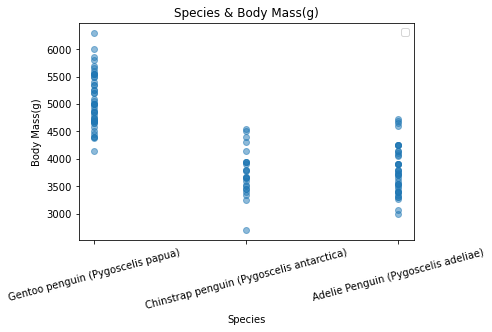

In [8]:
X = train_df['Species'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Species & Body Mass(g)')
plt.xlabel('Species')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Island & Body Mass(g)

In [9]:
train_df[['Island', 'Body Mass (g)']].groupby(['Island'], as_index = True).mean()

,Body Mass (g)
Island,
Biscoe,4878.947368
Dream,3764.772727
Torgersen,3817.307692


No handles with labels found to put in legend.


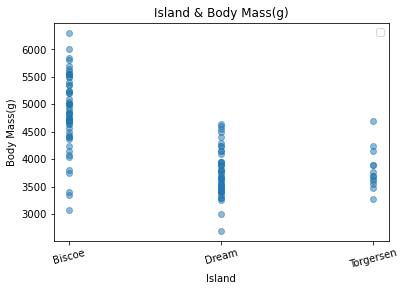

In [10]:
X = train_df['Island'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Island & Body Mass(g)')
plt.xlabel('Island')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Clutch Completion(관찰된 펭귄 둥지의 알[2개일 경우 Full Clutch : Yes]) & Body Mass (g)

In [11]:
train_df[['Clutch Completion', 'Body Mass (g)']].groupby(['Clutch Completion'], as_index = True).mean()

,Body Mass (g)
Clutch Completion,
No,4116.666667
Yes,4352.696078


No handles with labels found to put in legend.


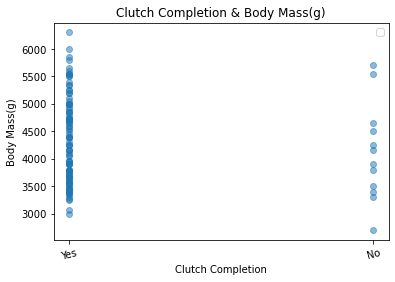

In [12]:
X = train_df['Clutch Completion'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Clutch Completion & Body Mass(g)')
plt.xlabel('Clutch Completion')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Culmen Length(부리의 길이) & Body Mass (g)

In [13]:
train_df[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index = True).mean()

,Body Mass (g)
Culmen Length (mm),
33.5,3600.0
34.0,3400.0
34.1,3475.0
35.3,3800.0
35.5,3350.0
...,...
52.8,4550.0
53.4,5500.0
53.5,4500.0


No handles with labels found to put in legend.


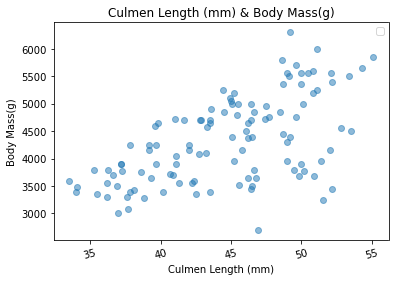

In [14]:
X = train_df['Culmen Length (mm)'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Culmen Length (mm) & Body Mass(g)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Culmen Depth (부리의 높이[세로]) & Body Mass (g)

In [15]:
train_df[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index = True).mean().head()

,Body Mass (g)
Culmen Depth (mm),
13.2,4500.0
13.3,5100.0
13.5,4150.0
13.9,4900.0
14.0,4575.0


No handles with labels found to put in legend.


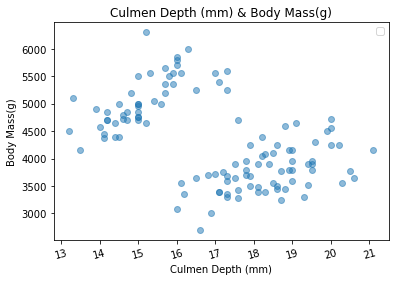

In [16]:
X = train_df['Culmen Depth (mm)'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Culmen Depth (mm) & Body Mass(g)')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Sex(성) & Body Mass (g)

In [17]:
train_df[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index = True).mean()

,Body Mass (g)
Sex,
FEMALE,4000.909091
MALE,4659.821429


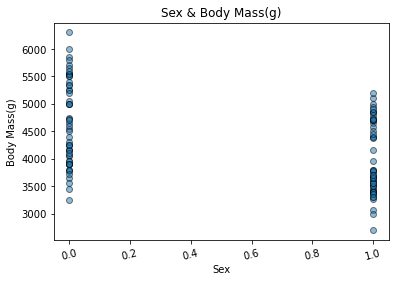

In [18]:
train_df['Sex'].replace(['MALE','FEMALE'],[0,1],inplace=True)
X = train_df['Sex'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5, cmap=plt.cm.get_cmap('prism', train_df['Sex'].nunique()), edgecolors='black')
plt.title('Sex & Body Mass(g)')
plt.xlabel('Sex')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.show()

Delta 15 N (o/oo) [토양에 따라 변화하는 안정 동위원소 15N:14N의 비율] & Body Mass (g)

In [19]:
train_df[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index = True).mean()

,Body Mass (g)
Delta 15 N (o/oo),
7.63220,5000
7.63452,4700
7.63884,4150
7.82381,3550
7.88863,3600
...,...
9.68950,3250
9.72764,3900
9.77528,3450


No handles with labels found to put in legend.


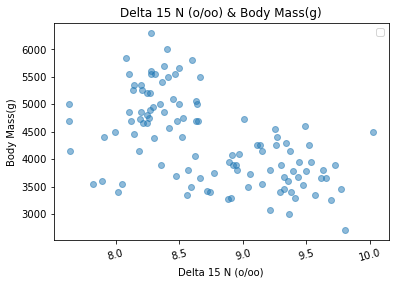

In [20]:
X = train_df['Delta 15 N (o/oo)'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Delta 15 N (o/oo) & Body Mass(g)')
plt.xlabel('Delta 15 N (o/oo)')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

Delta 13 C (o/oo) [먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율] & Body Mass (g)

In [21]:
train_df[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index = True).mean()


,Body Mass (g)
Delta 13 C (o/oo),
-27.01854,4400
-26.95470,4700
-26.89644,5100
-26.86352,4850
-26.84506,5350
...,...
-24.30229,3500
-24.25255,3775
-24.23592,3900


No handles with labels found to put in legend.


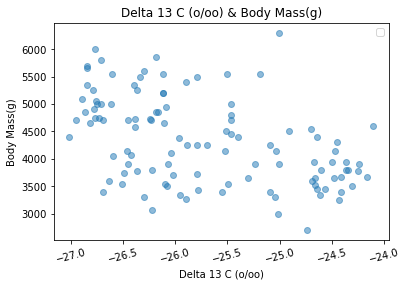

In [22]:
X = train_df['Delta 13 C (o/oo)'].values
Y = train_df['Body Mass (g)'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('Delta 13 C (o/oo) & Body Mass(g)')
plt.xlabel('Delta 13 C (o/oo)')
plt.ylabel('Body Mass(g)')
plt.xticks(rotation=15)
plt.legend()
plt.show()

### STR to INT

In [23]:
train_df['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)
test_df['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)

In [24]:
train_df['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
test_df['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)

In [25]:
train_df['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
test_df['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)

In [26]:
test_df['Sex'].replace(['MALE','FEMALE'],[0,1],inplace=True)

In [27]:
train_df.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,50.0,15.3,220,0.0,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,0.0,9.63074,-24.34684,3800
2,2,0,0,1,45.1,14.4,210,1.0,8.51951,-27.01854,4400
3,3,0,0,1,44.5,14.7,214,1.0,8.20106,-26.16524,4850
4,4,0,0,0,49.6,16.0,225,0.0,8.38324,-26.84272,5700


### 상관관계를 위한 히트맵

In [28]:
import seaborn as sns

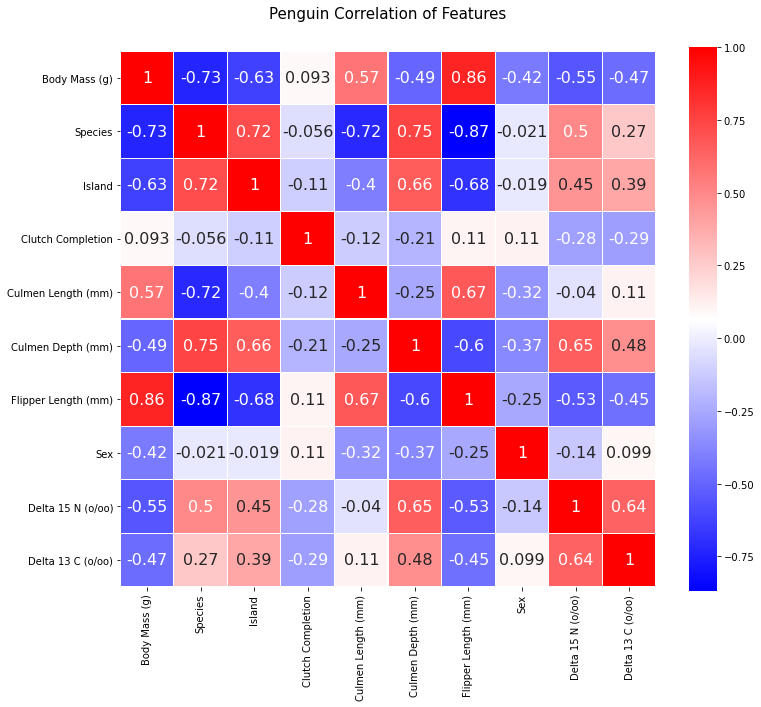

In [29]:
heatmap = train_df[['Body Mass (g)','Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] 
colormap = plt.cm.bwr
plt.figure(figsize=(12, 10))
plt.title('Penguin Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap.astype(float).corr(), linewidths=0.1, vmax=1.0,
          square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

Body Mass와 가장 상관관계가 있는 것은 Flipper Length (부리 길이)라는 것을 얻을 수 있다. 0에 수렴하는 상관관계는 필요없으니 배제하자.

In [30]:
train_df['Flipper Length (mm)'].mean()

203.05263157894737

Sex의 NaN값들을 채워주기 위해 위 평균값을 활용한다.

In [31]:
train_df['Sex'].mean()

0.4954954954954955

In [32]:
train_df.fillna(train_df.mean(), inplace = True)
test_df.fillna(test_df.mean(), inplace = True)

In [33]:
for col in train_df.columns:
  NaN_msg = 'column: {:>20}\t\t NaN비율: {:.2f}%'.format(col, 100 * (train_df[col].isnull().sum() / train_df[col].shape[0]))
  print(NaN_msg)

column:                   id		 NaN비율: 0.00%
column:              Species		 NaN비율: 0.00%
column:               Island		 NaN비율: 0.00%
column:    Clutch Completion		 NaN비율: 0.00%
column:   Culmen Length (mm)		 NaN비율: 0.00%
column:    Culmen Depth (mm)		 NaN비율: 0.00%
column:  Flipper Length (mm)		 NaN비율: 0.00%
column:                  Sex		 NaN비율: 0.00%
column:    Delta 15 N (o/oo)		 NaN비율: 0.00%
column:    Delta 13 C (o/oo)		 NaN비율: 0.00%
column:        Body Mass (g)		 NaN비율: 0.00%


In [34]:
for col in test_df.columns:
  NaN_msg = 'column: {:>20}\t\t NaN비율: {:.2f}%'.format(col, 100 * (test_df[col].isnull().sum() / test_df[col].shape[0]))
  print(NaN_msg)

column:                   id		 NaN비율: 0.00%
column:              Species		 NaN비율: 0.00%
column:               Island		 NaN비율: 0.00%
column:    Clutch Completion		 NaN비율: 0.00%
column:   Culmen Length (mm)		 NaN비율: 0.00%
column:    Culmen Depth (mm)		 NaN비율: 0.00%
column:  Flipper Length (mm)		 NaN비율: 0.00%
column:                  Sex		 NaN비율: 0.00%
column:    Delta 15 N (o/oo)		 NaN비율: 0.00%
column:    Delta 13 C (o/oo)		 NaN비율: 0.00%


flipper length와 Sex 모두 NaN 비율이 0%가 되었다. 잘 처리되었다.
Delta 15 N과 13 C도 마찬가지로 평균값을 통해 채워준다.

In [35]:
train_df.loc[(train_df['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = 8.73763414414414
test_df.loc[(test_df['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = 8.731226347031962

train_df.loc[(train_df['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = -25.723051081081067
test_df.loc[(test_df['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = -25.667744681818192

In [36]:
train_df = pd.get_dummies(train_df, columns=['Species'], prefix='Species')
test_df = pd.get_dummies(test_df, columns=['Species'], prefix='Species')

In [37]:
train_df

,id,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2
0,0,0,1,50.0,15.3,220,0.0,8.305150,-25.190170,5550,1,0,0
1,1,1,0,49.5,19.0,200,0.0,9.630740,-24.346840,3800,0,1,0
2,2,0,1,45.1,14.4,210,1.0,8.519510,-27.018540,4400,1,0,0
3,3,0,1,44.5,14.7,214,1.0,8.201060,-26.165240,4850,1,0,0
4,4,0,0,49.6,16.0,225,0.0,8.383240,-26.842720,5700,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,2,1,36.6,17.8,185,1.0,8.737634,-25.723051,3700,0,0,1
110,110,1,1,39.2,18.6,190,0.0,9.110060,-25.795490,4250,0,0,1
111,111,1,1,43.2,18.5,192,0.0,8.970250,-26.036790,4100,0,0,1
112,112,1,0,46.9,16.6,192,1.0,9.805890,-24.737350,2700,0,1,0


In [38]:
train_df = pd.get_dummies(train_df, columns=['Island'], prefix='Island')
test_df = pd.get_dummies(test_df, columns=['Island'], prefix='Island')

In [39]:
train_df.head()

,id,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,0,1,50.0,15.3,220,0.0,8.30515,-25.19017,5550,1,0,0,1,0,0
1,1,0,49.5,19.0,200,0.0,9.63074,-24.34684,3800,0,1,0,0,1,0
2,2,1,45.1,14.4,210,1.0,8.51951,-27.01854,4400,1,0,0,1,0,0
3,3,1,44.5,14.7,214,1.0,8.20106,-26.16524,4850,1,0,0,1,0,0
4,4,0,49.6,16.0,225,0.0,8.38324,-26.84272,5700,1,0,0,1,0,0


pandas에서 제공하는 원핫인코딩 사용, 멀티 핫 인코딩을 사용하기엔 딱 3개의 종류만 있어서 쓰지 않음.  
https://www.codegrepper.com/code-examples/python/multi+hot+encode+pandas+column

상관 관계가 적은 feature을 걸러주자

In [40]:
train_df.drop(['id', 'Clutch Completion'], axis=1, inplace=True)
test_df.drop(['id', 'Clutch Completion'], axis=1, inplace=True)

In [41]:
train_df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,50.0,15.3,220,0.0,8.305150,-25.190170,5550,1,0,0,1,0,0
1,49.5,19.0,200,0.0,9.630740,-24.346840,3800,0,1,0,0,1,0
2,45.1,14.4,210,1.0,8.519510,-27.018540,4400,1,0,0,1,0,0
3,44.5,14.7,214,1.0,8.201060,-26.165240,4850,1,0,0,1,0,0
4,49.6,16.0,225,0.0,8.383240,-26.842720,5700,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,1.0,8.737634,-25.723051,3700,0,0,1,0,0,1
110,39.2,18.6,190,0.0,9.110060,-25.795490,4250,0,0,1,0,1,0
111,43.2,18.5,192,0.0,8.970250,-26.036790,4100,0,0,1,0,1,0
112,46.9,16.6,192,1.0,9.805890,-24.737350,2700,0,1,0,0,1,0


In [42]:
temp_train_df = train_df[['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
temp_test_df = test_df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(temp_train_df)
scaler.fit(temp_test_df)
train_normalization_array = scaler.transform(temp_train_df)
test_normalization_array = scaler.transform(temp_test_df)

train_normalization_df = pd.DataFrame(train_normalization_array)
test_normalization_df = pd.DataFrame(test_normalization_array)
train_normalization_df.columns = [['Culmen Length (mm)' ,'Culmen Depth (mm)','Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
test_normalization_df.columns = [['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

In [44]:
train_spare_df = train_df[['Sex', 'Species_0', 'Species_1', 'Species_2', 'Island_0', 'Island_1', 'Island_2', 'Body Mass (g)']]
test_spare_df = test_df[['Sex', 'Species_0', 'Species_1', 'Species_2', 'Island_0', 'Island_1', 'Island_2']]

In [45]:
train_df = pd.concat([train_normalization_df, train_spare_df], axis=1)
test_df = pd.concat([test_normalization_df, test_spare_df], axis = 1)

In [46]:
train_df.head()

,"(Culmen Length (mm),)","(Culmen Depth (mm),)","(Flipper Length (mm),)","(Delta 15 N (o/oo),)","(Delta 13 C (o/oo),)",Sex,Species_0,Species_1,Species_2,Island_0,Island_1,Island_2,Body Mass (g)
0,1.169203,-0.965610,1.478187,-0.799776,0.641200,0.0,1,0,0,1,0,0,5550
1,1.078196,0.895881,0.011259,1.688452,1.773470,0.0,0,1,0,0,1,0,3800
2,0.277333,-1.418405,0.744723,-0.397407,-1.813602,1.0,1,0,0,1,0,0,4400
3,0.168124,-1.267473,1.038108,-0.995160,-0.667946,1.0,1,0,0,1,0,0,4850
4,1.096398,-0.613436,1.844918,-0.653195,-1.577543,0.0,1,0,0,1,0,0,5700


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [48]:
score_list = []

C:\Users\wlsrn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\wlsrn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\wlsrn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763136.316195329, tolerance: 5722.489010989012
  model = cd_fast.enet_coordinate_descent(
C:\Users\wlsrn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


alpha value : 0 일 때 평균 rmse : 327.9017
alpha value : 1 일 때 평균 rmse : 326.6369
alpha value : 2 일 때 평균 rmse : 325.8425
alpha value : 3 일 때 평균 rmse : 325.3367
alpha value : 4 일 때 평균 rmse : 324.8486
alpha value : 5 일 때 평균 rmse : 324.5054
alpha value : 6 일 때 평균 rmse : 324.1481
alpha value : 7 일 때 평균 rmse : 323.9136
alpha value : 8 일 때 평균 rmse : 323.6997
alpha value : 9 일 때 평균 rmse : 323.6392
alpha value : 10 일 때 평균 rmse : 323.8585
alpha value : 11 일 때 평균 rmse : 324.1978
alpha value : 12 일 때 평균 rmse : 324.525
alpha value : 13 일 때 평균 rmse : 324.8718
alpha value : 14 일 때 평균 rmse : 325.4308
alpha value : 15 일 때 평균 rmse : 326.2463
alpha value : 16 일 때 평균 rmse : 327.1638
alpha value : 17 일 때 평균 rmse : 328.0885
alpha value : 18 일 때 평균 rmse : 329.108
alpha value : 19 일 때 평균 rmse : 330.2477
alpha value : 20 일 때 평균 rmse : 331.4021
alpha value : 21 일 때 평균 rmse : 332.6176
alpha value : 22 일 때 평균 rmse : 333.861
alpha value : 23 일 때 평균 rmse : 335.1771
alpha value : 24 일 때 평균 rmse : 336.5614
alpha value :

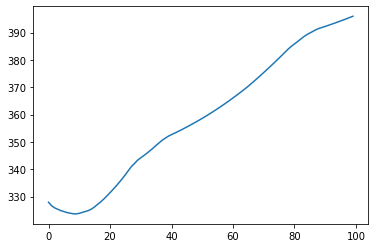

In [49]:
alphas = []
rmse = []

train_label = train_df['Body Mass (g)']
train_df.drop(['Body Mass (g)'], axis=1, inplace=True)

for i in range(0, 100, 1):
  alphas.append(i)

for alpha in alphas:
  ridge = Lasso(alpha=alpha)
  
  neg_mse_scores = cross_val_score(ridge, train_df, train_label, scoring= 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
  rmse.append(np.round(avg_rmse, 4))
  print('alpha value :', alpha, '일 때 평균 rmse :', np.round(avg_rmse, 4))

plt.plot(alphas, rmse)

In [50]:
model = KNeighborsRegressor(n_neighbors=5).fit(train_df, train_label)
score_list.append(f'KNeighborsRegressor: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = LinearRegression().fit(train_df, train_label)
score_list.append(f'LinearRegression: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = Ridge().fit(train_df, train_label)
score_list.append(f'Ridge: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = Lasso().fit(train_df, train_label)
score_list.append(f'Lasso: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = DecisionTreeRegressor().fit(train_df, train_label)
score_list.append(f'DecisionTreeRegressor: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = RandomForestRegressor().fit(train_df, train_label)
score_list.append(f'RandomForestRegressor: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = GradientBoostingRegressor().fit(train_df, train_label)
score_list.append(f'GradientBoostingRegressor: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

model = XGBRegressor().fit(train_df, train_label)
score_list.append(f'XGBRegressor: train_score: {model.score(train_df, train_label)}, val_score: {model.score(train_df, train_label)}')

In [51]:
[print(i) for i in score_list]

KNeighborsRegressor: train_score: 0.8686906247080092, val_score: 0.8686906247080092
LinearRegression: train_score: 0.8660509430637602, val_score: 0.8660509430637602
Ridge: train_score: 0.8646611926465849, val_score: 0.8646611926465849
Lasso: train_score: 0.8659352220008842, val_score: 0.8659352220008842
DecisionTreeRegressor: train_score: 1.0, val_score: 1.0
RandomForestRegressor: train_score: 0.9722517422277567, val_score: 0.9722517422277567
GradientBoostingRegressor: train_score: 0.9860542770020251, val_score: 0.9860542770020251
XGBRegressor: train_score: 0.9999999939614264, val_score: 0.9999999939614264


[None, None, None, None, None, None, None, None]

In [52]:
tmp = min(rmse)
index = rmse.index(tmp)

print(index)

9


In [53]:
ridge = Ridge(alpha = 2)
model_Ridge = ridge.fit(train_df, train_label)
lasso = Lasso(alpha = 9)
model_Lasso = lasso.fit(train_df, train_label)
model_XGB = XGBRegressor().fit(train_df, train_label)

In [54]:
pred_XGB = model_XGB.predict(test_df)
pred_Ridge = model_Ridge.predict(test_df)
pred_lasso = model_Lasso.predict(test_df)
pred = pred_XGB * 0.33 + pred_Ridge * 0.33 + pred_lasso * 0.33

In [55]:
submission = pd.read_csv('./data/sample_submission.csv')

In [56]:
submission['Body Mass (g)'] = pred

In [57]:
submission.to_csv('./data/my_submission.csv', index=False)

### 2021-01-07 final code